In [171]:
#Importing important libraries
import requests
import json

import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

### Properties

In [172]:
#Mounting the google colab with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [244]:
#read the properties csv using the pandas read_csv() method
properties_raw_data = pd.read_csv('/content/drive/MyDrive/Data Folder/properties.csv', index_col = 0)

In [245]:
# here are the data types
properties_raw_data.dtypes

,0
﻿id,int64
building,int64
date_sale,object
type,object
property#,int64
area,float64
price,object
status,object
customerid,object


### Customers

In [246]:
#read the properties csv using the pandas read_csv() method
customers_raw_data = pd.read_csv('/content/drive/MyDrive/Data Folder/customers.csv', index_col = 0)

In [247]:
customers_raw_data.dtypes

,0
﻿customerid,object
entity,object
name,object
surname,object
birth_date,object
sex,object
country,object
state,object
purpose,object
deal_satisfaction,int64


# Data Cleaning and Preprocessing

## Properties

In [248]:
# Creating a copy of the original data for safekeeping and future reference.
properties = properties_raw_data.copy()


In [174]:
#Inspecting data summary statistics, including non-numeric columns.
properties.describe(include='all')

,﻿id,building,date_sale,type,property#,area,price,status,customerid
count,267.000000,267.000000,267,267,267.000000,267.000000,267,267,195
unique,NaN,NaN,44,2,NaN,NaN,266,2,162
top,NaN,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,NaN,NaN,72,259,NaN,NaN,2,195,9
mean,2975.142322,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,1392.197474,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,1002.000000,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,2015.500000,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,3024.000000,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,4031.500000,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


In [249]:
properties.dtypes


,0
﻿id,int64
building,int64
date_sale,object
type,object
property#,int64
area,float64
price,object
status,object
customerid,object


In [250]:
#Converting ID to String: Preventing Misinterpretation and Potential Errors

In [251]:
#To check column values, we'll use the 'array' attribute as it's preferred in newer pandas versions.
#It seems an encoding issue has brought in a byte order mark (BOM), which is metadata we don't need.
properties.columns.array

<NumpyExtensionArray>
[  '\ufeffid',   'building',  'date_sale',       'type',  'property#',
       'area',      'price',     'status', 'customerid']
Length: 9, dtype: object

In [252]:
#We can fix this by either correcting it during data collection or renaming the column.
#Using the 'rename' function is simple; it maps old column names to new ones.
properties = properties.rename(columns= {'\ufeffid':'id'})

# Let's preview our dataset to confirm the changes.
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [253]:
#Converting 'id' to a string to avoid unintended numerical operations.
#Treating 'id' as a string reinforces its role as an identifier, not a numeric variable.

properties['id'] = properties['id'].astype(str)
# Let's examine the 'id' column to confirm our changes.
properties['id']

,id
0,1030
1,1029
2,2002
3,2031
4,1049
...,...
262,5044
263,5047
264,5048
265,5050


In [15]:
# The same applies for the 'building' and 'property#' variables
properties['building'] = properties['building'].astype(str)
properties['property#'] = properties['property#'].astype(str)

# let's check the new data types
properties.dtypes

,0
id,object
building,object
date_sale,object
type,object
property#,object
area,float64
price,object
status,object
customerid,object


In [254]:
properties.describe(include='all')

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267.000000,267,267,267.000000,267.000000,267,267,195
unique,240,NaN,44,2,NaN,NaN,266,2,162
top,5041,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,2,NaN,72,259,NaN,NaN,2,195,9
mean,NaN,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,NaN,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,NaN,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,NaN,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,NaN,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


In [255]:
#Noticing that all variables except 'area' are 'object' types raises concerns about their classification.
#Investigating 'date of sale', we find 44 unique entries out of 267, which is unusual and needs attention.

properties['date_sale'].unique()
# Findings:
# 1. Some entries, like '#NUM!', seem to be placeholders for missing or erroneous data from Excel.
# 2. All dates default to the first of the month, indicating transactions might be logged by month, not exact dates.
# 3. The 'date_sale' column is classified as 'object', treating dates as strings instead of actual datetime objects.


array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

In [257]:
#First, we'll replace the Excel-specific missing value indicator '#NUM!' with pandas' null value, pd.NA.
#Using NumPy's np.where is a simple way to handle this substitution effectively.
properties['date_sale'] = np.where(properties['date_sale']=='#NUM!', pd.NA, properties['date_sale'])

# After running this, recheck unique entries to confirm '#NUM!' has been replaced by '<NA>'.
properties['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', <NA>, '9/1/2005', '7/1/2005'], dtype=object)

In [258]:
#Next, convert the 'date_sale' column to a datetime type for easier manipulation and analysis.
properties['date_sale'] = pd.to_datetime(properties['date_sale'])
# Let's review the changes.
properties['date_sale']

# Note that the default precision of datetime is nanoseconds, represented as '[ns]'.
# Also, since we're using the dedicated pandas null type, 'pd.NA',
# the datetime function knows to convert these into 'NaT' (not a timestamp).

,date_sale
0,2005-11-01
1,2005-10-01
2,2007-07-01
3,2007-12-01
4,2004-11-01
...,...
262,NaT
263,NaT
264,NaT
265,NaT


In [259]:
# Post-conversion, the total 'date_sale' entries are 195, with unique values reducing to 43.
# This happens because replacing empty strings with 'NaT' eliminates one unique value.
# Additionally, there are now 72 missing values (267 - 195).

properties.describe(include="all")

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267.000000,195,267,267.000000,267.000000,267,267,195
unique,240,NaN,NaN,2,NaN,NaN,266,2,162
top,5041,NaN,NaN,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,2,NaN,NaN,259,NaN,NaN,2,195,9
mean,NaN,2.947566,2006-11-08 14:38:46.153846272,NaN,27.580524,936.221311,NaN,NaN,NaN
min,NaN,1.000000,2004-03-01 00:00:00,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,NaN,2.000000,2006-04-16 00:00:00,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,NaN,3.000000,2007-03-01 00:00:00,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,NaN,4.000000,2007-09-01 00:00:00,NaN,40.000000,1121.950000,NaN,NaN,NaN
max,NaN,5.000000,2010-05-01 00:00:00,NaN,59.000000,1942.500000,NaN,NaN,NaN


In [260]:
properties['type'].unique()

array(['Apartment', 'Office'], dtype=object)

In [261]:
# Focus on the 'type' column, which appears well-formatted but can benefit from standardization.
# We'll convert all entries to lowercase for consistency using the `.lower()` method.
properties['type'] = properties['type'].str.lower()

In [262]:
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014


In [263]:
# Observing the data types reveals that 'price' is of object type, which is unexpected.
# We'll need to convert it to a float for proper numerical operations.
properties.dtypes


,0
id,object
building,int64
date_sale,datetime64[ns]
type,object
property#,int64
area,float64
price,object
status,object
customerid,object


In [264]:
# The '$' symbol in the 'price' column prevents it from being a numeric type.
# We'll remove the '$' sign and create a new Series 'price$' for clarity.

properties['price$'] = properties['price'].str.strip('$')
# Let's take a peek at the dataset to see the changes.
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,"246,172.68"
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,"246,331.90"
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,"209,280.91"
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,"452,667.01"
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,"467,083.31"


In [265]:
# Next, the goal is to convert the 'price$' column to a float data type.
# properties['price$'] = properties['price$'].astype(float)

# However, this throws an error due to the thousands separator ',' still present in the data.

In [266]:
# The .strip() method only removes characters from the start and end of a string.
# To remove symbols like ',' from the middle, we'll use the .replace() method.
# Setting `regex=True` ensures all instances of ',' are correctly replaced with an empty string.

properties['price$']= properties['price$'].replace(",","",regex=True)
# Let's preview the data once more to check our progress.
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,467083.31


In [267]:
# now we can carry on with casting price into a float
properties['price$'] = properties['price$'].astype(float)

In [268]:
# now we can safely drop price from our dataframe
properties = properties.drop(['price'],axis=1)
properties.head()

,id,building,date_sale,type,property#,area,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,Sold,C0014,467083.31


In [269]:
# We can also check the data types at this point
properties.dtypes

,0
id,object
building,int64
date_sale,datetime64[ns]
type,object
property#,int64
area,float64
status,object
customerid,object
price$,float64


In [270]:
# The 'status' column is critical for our analysis.
# First, let's check its unique values to understand its structure.
properties['status'].unique()

# Observations: There are no missing values.
# However, we notice inconsistencies like 'Sold' being capitalized and surrounded by spaces,
# which could hinder data uniformity and analysis.

array([' Sold ', '-'], dtype=object)

In [271]:
# To standardize the 'status' column for consistency, we'll first remove any surrounding spaces using .strip()
# and then convert all the text to lowercase for uniformity.

properties['status'] = properties['status'].str.strip()
properties['status'] = properties['status'].str.lower()

# Let's examine the unique values again to confirm our changes.
properties['status'].unique()

array(['sold', '-'], dtype=object)

In [272]:
# We will rename the 'status' column to 'sold' and then convert the values into binary format:
# 1 for sold properties and 0 for unsold properties (represented by '-').

# Replace '-' with 0 (unsold) and 'sold' with 1 (sold)

properties = properties.rename(columns= {'status':'sold'})


In [273]:
# The .map() method has now been applied to convert the 'sold' column values into 1 for sold and 0 for unsold.

properties['sold'] = properties['sold'].map({'sold':1,'-':0})
# Let's view the unique values in 'sold' to confirm our transformations.
properties['sold'].unique()

array([1, 0])

In [274]:
properties.dtypes

,0
id,object
building,int64
date_sale,datetime64[ns]
type,object
property#,int64
area,float64
sold,int64
customerid,object
price$,float64


In [275]:
# finally we can check for missing values
properties.isna().sum()

# From the initial check, it seems that only the 'date_sale' column has missing values.
# For a more thorough verification, you can also inspect unique values for each column to confirm.

,0
id,0
building,0
date_sale,72
type,0
property#,0
area,0
sold,0
customerid,72
price$,0


In [276]:
# To wrap up the cleaning process, let's take a look at our final, tidied dataset.
properties

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78


## Customers

In [277]:
# To make the code more convenient and avoid unnecessary scrolling, Creating a copy of the raw customer data.
customers = customers_raw_data.copy()

In [278]:
# Let's begin by inspecting the column names to understand the structure of the dataset
customers.columns.array

# Rather than jumping to conclusions, we will first check the column structure.
# It seems that pandas might have interpreted the JSON format differently.
#customers.columns.values

<NumpyExtensionArray>
[ '\ufeffcustomerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [279]:
# renamed customerid in an appropriate way
customers = customers.rename(columns= {'\ufeffcustomerid':'customerid'})
customers.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [282]:
# Let's get an overview of our data. First, we'll examine the descriptive statistics of all variables.
customers.describe(include="all")

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [281]:
# Next, let's check the data types of our variables.
customers.dtypes

,0
customerid,object
entity,object
name,object
surname,object
birth_date,object
sex,object
country,object
state,object
purpose,object
deal_satisfaction,int64


In [283]:
# Let's verify if there are any missing values in the dataset.
customers.isna().sum()

# Interestingly, there don't appear to be any missing values. This could be due to all values being stored as strings.


,0
customerid,0
entity,0
name,0
surname,0
birth_date,7
sex,7
country,0
state,8
purpose,0
deal_satisfaction,0


In [284]:
# Renaming 'entity' and 'purpose' to names that could potentially represent an indicator variable.
customers = customers.rename(columns= {'entity':'individual'})
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [285]:
# Let's examine the unique values in the 'individual' column to understand its distribution.
customers['individual'].unique()

array(['Individual', 'Company'], dtype=object)

In [286]:
# To make 'individual' a Boolean-like variable (at least conceptually), let's map 'Individual' to 1 and 'Company' to 0.
customers['individual'] = customers['individual'].map({'Individual':1,'Company':0})

In [287]:
# Now, let's examine the 'sex' variable.
customers['sex'].unique()

# It appears there are three options: 'F', 'M', and an empty string.
# We should map the empty string to NaN to indicate missing data.

array(['F', 'M', nan], dtype=object)

In [288]:
# We will map 'F' and 'M' to '1' and '0' respectively, while treating empty values as missing (pd.NA).
customers['sex'] = customers['sex'].map({'F':'1', 'M':'0', '':pd.NA})

# Note that using np.where would not be ideal in this case, as it would classify all missing values as '0' ,
# which could lead to incorrect analysis.

In [289]:
# Let's verify the missing data.
customers.isna().sum()


,0
customerid,0
individual,0
name,0
surname,0
birth_date,7
sex,7
country,0
state,8
purpose,0
deal_satisfaction,0


In [290]:
# To ensure consistency, we will convert all values in the 'purpose' and 'source' columns to lowercase.
customers['purpose'] = customers['purpose'].str.lower()
customers['source'] = customers['source'].str.lower()

# Let's have a look at the changes.
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,Yes,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,No,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,Yes,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,No,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,No,website


In [291]:
# For the 'mortgage' column, we'll convert 'No' to 0 and 'Yes' to 1 to simplify its representation.
customers['mortgage'] = customers['mortgage'].map({'No':0,'Yes':1})

# Let's see how the dataframe looks now.
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,0,website


In [292]:
# Lastly, let's check for any missing values.
customers.isna().sum()

,0
customerid,0
individual,0
name,0
surname,0
birth_date,7
sex,7
country,0
state,8
purpose,0
deal_satisfaction,0


In [294]:
# We want to create a new column 'full_name' that combines the 'name' and 'surname' of each customer.
# This can be achieved by simply adding the 'name' and 'surname' columns, with a space in between.
customers['full_name'] = customers['name'] + " " + customers['surname']

# Now, let's check how our dataframe looks.
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,0,website,Marleez Co


In [295]:
# After creating the 'full_name' column, we no longer need the individual 'name' and 'surname' columns.
# Let's drop these columns from the dataframe.
customers = customers.drop(['name', 'surname'], axis=1)

# Let's take a look at the dataframe now.
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaN,NaN,USA,California,investment,5,0,website,Marleez Co


In [296]:
# Next, we want to convert 'birth_date' to a datetime format.
# This will make it easier for us to work with this data in the future.
customers['birth_date'] = pd.to_datetime(customers['birth_date'])

# Let's check the dataframe one more time.
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [297]:
# Finally, let's take a look at the datatypes of our columns to confirm the changes.
customers.dtypes

,0
customerid,object
individual,int64
birth_date,datetime64[ns]
sex,object
country,object
state,object
purpose,object
deal_satisfaction,int64
mortgage,int64
source,object


In [298]:
# Let's review the status of missing values.
customers.isna().sum()


,0
customerid,0
individual,0
birth_date,7
sex,7
country,0
state,8
purpose,0
deal_satisfaction,0
mortgage,0
source,0


In [299]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


## Combine the two tables

In [300]:
properties.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31


In [301]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [302]:
# Merging the 'properties' and 'customers' datasets using the 'customerid' as the common key.
# A left join ensures that all rows from the 'properties' dataset are kept, and matching rows from the 'customers' dataset are added.
# Non-matching customer records will have 'NA' values for columns from the 'customers' dataframe.
pd.merge(properties, customers, on='customerid', how='left')

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
# The merge did not work as intended.
# There probably is a problem with the key, so we will investigate further.
properties.customerid.unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [304]:
# Let's check for any unwanted spaces or formatting issues in the 'customerid' column.
# Using the .unique() method helps to identify any unexpected entries, such as extra spaces in the 'customerid' values.

customers.customerid.unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

In [305]:
# Let's trim the unnecessary white space from 'customerid' in the properties dataframe.
properties['customerid'] = properties['customerid'].str.strip()

# Although there's no noticeable issue with the customers dataframe, we'll trim the 'customerid' column to maintain consistency.
customers['customerid'] = customers['customerid'].str.strip()

In [306]:
# To ensure a successful merge, we must ensure that 'customerid' in the customers table has only unique values.

customers.count()

,0
customerid,162
individual,162
birth_date,155
sex,155
country,162
state,154
purpose,162
deal_satisfaction,162
mortgage,162
source,162


In [307]:
# the count of unique entries in the 'customerid' column of the properties dataframe.
properties['customerid'].nunique()

162

In [308]:
# We've observed that there's an empty space in 'customerid' in the 'properties' dataframe.
# Let's replace it with 'NA'.
properties['customerid'] = np.where(properties['customerid']=='', pd.NA, properties['customerid'])

In [309]:
# Let's rename our merged dataframe to 'real_estate_data' for clarity.
real_estate_data = pd.merge(properties, customers, on='customerid', how='left')

In [310]:
# Our data preprocessing step has been successful. Let's take a look at the head of our processed dataframe.
real_estate_data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [311]:
real_estate_data.tail()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,5051,5,NaT,apartment,51,789.25,0,NaN,199216.40,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
# Given the numerous NaN values in our dataset,
# it would be beneficial to replace them with pandas' native representation for missing values.
real_estate_data.fillna(pd.NA)

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,<NA>,322610.74,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
263,5047,5,NaT,apartment,47,794.52,0,<NA>,279191.26,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
264,5048,5,NaT,apartment,48,1013.27,0,<NA>,287996.53,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
265,5050,5,NaT,apartment,50,1074.71,0,<NA>,365868.78,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>


In [313]:
real_estate_data.dtypes

,0
id,object
building,int64
date_sale,datetime64[ns]
type,object
property#,int64
area,float64
sold,int64
customerid,object
price$,float64
individual,float64


# Statistics

In [314]:
# After finishing with cleaning and preprocessing, it's advisable to create a checkpoint.
# We'll assign the cleaned and preprocessed data to a new variable 'data'.
data = real_estate_data.copy()

In [315]:
# Let's inspect the first few rows of our processed data.
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [316]:
# As we're transitioning into the statistical analysis phase, running descriptive statistics would be particularly helpful.
data.describe()

,building,date_sale,property#,area,sold,price$,individual,birth_date,deal_satisfaction,mortgage
count,267.000000,195,267.000000,267.000000,267.000000,267.000000,195.000000,178,195.000000,195.000000
mean,2.947566,2006-11-08 14:38:46.153846272,27.580524,936.221311,0.730337,281171.901386,0.912821,1961-01-08 11:35:43.820224704,3.600000,0.317949
min,1.000000,2004-03-01 00:00:00,1.000000,410.710000,0.000000,117564.070000,0.000000,1931-02-13 00:00:00,1.000000,0.000000
25%,2.000000,2006-04-16 00:00:00,14.500000,756.210000,0.000000,217553.055000,1.000000,1951-05-04 06:00:00,3.000000,0.000000
50%,3.000000,2007-03-01 00:00:00,28.000000,798.280000,1.000000,249075.660000,1.000000,1962-09-23 00:00:00,4.000000,0.000000
75%,4.000000,2007-09-01 00:00:00,40.000000,1121.950000,1.000000,326964.855000,1.000000,1970-07-09 06:00:00,5.000000,1.000000
max,5.000000,2010-05-01 00:00:00,59.000000,1942.500000,1.000000,538271.740000,1.000000,1986-06-21 00:00:00,5.000000,1.000000
std,1.391794,NaN,15.361437,284.894858,0.444618,89119.121005,0.282824,NaN,1.340872,0.466878


In [317]:
data.describe(include="all")

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,267,267.000000,195,267,267.000000,267.000000,267.000000,195,267.000000,195.000000,178,178,195,181,195,195.000000,195.000000,195,195
unique,240,NaN,NaN,2,NaN,NaN,NaN,162,NaN,NaN,NaN,2,9,9,2,NaN,NaN,3,162
top,5041,NaN,NaN,apartment,NaN,NaN,NaN,C0174,NaN,NaN,NaN,0,USA,California,home,NaN,NaN,website,Marleez Co
freq,2,NaN,NaN,259,NaN,NaN,NaN,9,NaN,NaN,NaN,108,165,120,119,NaN,NaN,119,9
mean,NaN,2.947566,2006-11-08 14:38:46.153846272,NaN,27.580524,936.221311,0.730337,NaN,281171.901386,0.912821,1961-01-08 11:35:43.820224704,NaN,NaN,NaN,NaN,3.600000,0.317949,NaN,NaN
min,NaN,1.000000,2004-03-01 00:00:00,NaN,1.000000,410.710000,0.000000,NaN,117564.070000,0.000000,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,2.000000,2006-04-16 00:00:00,NaN,14.500000,756.210000,0.000000,NaN,217553.055000,1.000000,1951-05-04 06:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,3.000000,2007-03-01 00:00:00,NaN,28.000000,798.280000,1.000000,NaN,249075.660000,1.000000,1962-09-23 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,4.000000,2007-09-01 00:00:00,NaN,40.000000,1121.950000,1.000000,NaN,326964.855000,1.000000,1970-07-09 06:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,5.000000,2010-05-01 00:00:00,NaN,59.000000,1942.500000,1.000000,NaN,538271.740000,1.000000,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


## Breakdowns by building

We can examine:
1. Breakdown of totals by building (frequency distribution by building)
2. Breakdown of averages by building

In [318]:
# Let's identify the unique buildings in our dataset.
data['building'].unique()

array([1, 2, 3, 4, 5])

In [319]:
# Grouping the data by 'building'.
data.groupby('building')

### Breakdown of totals by building

In [320]:
# We'll create a variable to hold the columns we need for aggregation: 'building', 'sold', and 'mortgage'.
# This allows us to calculate the total number of properties sold and those under mortgage per building.

columns_of_interest = ['building', 'sold','mortgage']
totals_by_building = data[columns_of_interest].groupby("building").sum()
totals_by_building

# Note: The 'mortgage' column is a float due to the 'merge' operation. It can be recast to int if needed.

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


### Breakdown of averages by building

In [321]:
# We'll derive average values for 'area', 'price$', and 'deal_satisfaction' by building.
# The 'columns_of_interest' variable is used temporarily to hold the relevant columns for the groupby operation.
# This is a simple approach, but you can directly list columns in the groupby if preferred.
columns_of_interest = ['building', 'area', 'price$', 'deal_satisfaction']

averages_by_building = data[columns_of_interest].groupby("building").mean()
averages_by_building
# This will provide the average of the selected columns grouped by building.

,area,price$,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


## Breakdowns by country and state

Country
1. Breakdown of totals by country (frequency distribution by country)
2. Breakdown of averages by country

State
3. Frequency distribution by state
4. Relative frequency by state
5. Cumulative frequency by state

### Breakdown of totals by country

In [322]:
# We notice a duplication of USA entries and will now break down the data by country.
# We'll use the same 'columns_of_interest' as before to derive totals for 'sold' and 'mortgage'.
# The only adjustment is replacing 'building' with 'country' for the groupby operation.

columns_of_interest = ['country', 'sold','mortgage']
totals_by_country = data[columns_of_interest].groupby("country").sum()
totals_by_country
# This will give us the total counts of properties sold and those under mortgage, grouped by country.

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


In [323]:
# Let's inspect the unique values in the 'country' column.
data['country'].unique()

# Clearly, there are duplicate entries for USA,
# one of them has a trailing space, which needs to be addressed.

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada', nan], dtype=object)

In [324]:
# Instead of cleaning each 'object' column individually, we can apply the cleanup to all object-type columns at once.
# This approach helps catch any overlooked issues and ensures consistency across the dataset.

# The following is an efficient way to clean up all 'object' columns in the dataset:
object_columns = data.select_dtypes(['object']).columns
object_columns

Index(['id', 'type', 'customerid', 'sex', 'country', 'state', 'purpose',
       'source', 'full_name'],
      dtype='object')

In [325]:
# Ensure that all selected columns are treated as strings before stripping whitespaces
data[object_columns] = data[object_columns].apply(lambda x: x.astype(str).str.strip())


In [326]:
# This approach selects only the 'object' columns from the dataset
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [327]:
# Now we've achieved a much cleaner data set!
totals_by_country = data[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0
nan,0,0.0


### Breakdown of averages by country
Based on what you have seen before for the breakdowns by bulding and by state,Applying the breakdown by country of the columns 'area', 'deal_satisfaction', and 'price$'

In [328]:
# For the average computations, we use the following list of columns.
columns_of_interest = ['country', 'area', 'deal_satisfaction','price$']

# We create a new variable where we will store the data relevant to our calculations.
averages_by_country = data[columns_of_interest].groupby("country").mean()
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554
nan,1034.680556,NaN,312960.531806


### Frequency distribution by state

In [329]:
columns_of_interest = ['state', 'sold','mortgage']
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state


,sold,mortgage
state,,
Arizona,11,3.0
California,120,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [330]:
totals_by_state.sold.sum()

195

In [331]:
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0
nan,0,0.0


In [332]:
data['state'] = np.where(data['state']=='', pd.NA, data['state'])
data['state'] = np.where(data['country']!='USA', pd.NA, data['state'])

In [333]:
# here's the new result
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state

,sold,mortgage
state,,
Arizona,9,3.0
California,118,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [334]:
totals_by_state.sold.sum()

177

In [336]:
# To focus on the relative and cumulative frequency of sales, we can refine our table by state.
# We will start by excluding 'mortgage' from our columns of interest.
columns_of_interest = ['state', 'sold']

# We will store this data in a new variable called 'sold_by_state'.
sold_by_state = data[columns_of_interest].groupby("state").sum()
sold_by_state

,sold
state,
Arizona,9
California,118
Colorado,11
Kansas,1
Nevada,17
Oregon,11
Utah,5
Virginia,4
Wyoming,1


In [337]:
#To make the results clearer, we will sort the values in descending order to display countries with the highest sales at the top.
sold_by_state = sold_by_state.sort_values('sold', ascending=False)
sold_by_state

,sold
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [338]:
# The term 'sold' may not be the best to describe frequency, so we can rename this column.
sold_by_state = sold_by_state.rename(columns={'sold':'frequency'})
sold_by_state

,frequency
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


### Relative frequency distribution by state
1. Add a new column to the 'sold_by_state' data frame, called 'relative_frequency' which contains the relative frequency of the different states.
2. Add a new column to the 'sold_by_state' data frame, called 'cumulative_frequency' which contains the cumulative frequency of the different states.

In [339]:
# The relative frequency can be computed by dividing the frequency of each state by the total frequency.
sold_by_state['relative_frequency'] = sold_by_state['frequency']/sold_by_state['frequency'].sum()
sold_by_state

,frequency,relative_frequency
state,,
California,118,0.666667
Nevada,17,0.096045
Colorado,11,0.062147
Oregon,11,0.062147
Arizona,9,0.050847
Utah,5,0.028249
Virginia,4,0.022599
Kansas,1,0.005650
Wyoming,1,0.005650


In [340]:
# Cumulative frequency can be obtained using the 'cumsum()' function in pandas.
# This function calculates the cumulative sum of values in a Series.
# Applying this on our relative frequency column provides us with the cumulative frequency.
sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


# Data Analysis

## Customers Age

In [341]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [342]:
# Let's calculate the age of our buyers at the time of purchase.
# This can be done by subtracting the birth date from the sale date.
data['age_at_purchase'] = data['date_sale'] - data['birth_date']
data['age_at_purchase']


,age_at_purchase
0,7073 days
1,8255 days
2,7856 days
3,8009 days
4,9302 days
...,...
262,NaT
263,NaT
264,NaT
265,NaT


In [343]:
# The 'age_at_purchase' field is of timedelta type, which allows us to extract the number of days using the 'days' attribute.
# Here, we check the type of the value in 'age_at_purchase' after accessing the 'days' attribute.
type(data['age_at_purchase'][0].days)

int

In [344]:
# Convert 'age_at_purchase' from timedelta to days for better analysis
data['age_at_purchase'] = data['age_at_purchase'].apply(lambda x: x.days)
data['age_at_purchase']



,age_at_purchase
0,7073.0
1,8255.0
2,7856.0
3,8009.0
4,9302.0
...,...
262,NaN
263,NaN
264,NaN
265,NaN


In [345]:
# To obtain the age in years at the time of purchase, we can divide the 'age_at_purchase' field by 365.
# This may not be perfectly accurate due to leap years, but it should be close enough for our analysis.
data['age_at_purchase'] = data['age_at_purchase']/365
data['age_at_purchase']

,age_at_purchase
0,19.378082
1,22.616438
2,21.523288
3,21.942466
4,25.484932
...,...
262,NaN
263,NaN
264,NaN
265,NaN


In [346]:
# Since age is typically represented in whole numbers, we can round down the values using np.floor().
data['age_at_purchase_rounded'] = data['age_at_purchase'].apply(lambda x: np.floor(x))
data['age_at_purchase_rounded']

,age_at_purchase_rounded
0,19.0
1,22.0
2,21.0
3,21.0
4,25.0
...,...
262,NaN
263,NaN
264,NaN
265,NaN


### Create age intervals

In [347]:
# Retaining the original 'age_at_purchase' values for precision while segmenting the data into intervals.
# Using pandas' 'cut' method to divide 'age_at_purchase' into 10 intervals with 0 decimal precision.

data['age_interval'] = pd.cut(data['age_at_purchase'], bins = 10, precision = 0)
data['age_interval']

,age_interval
0,"(19.0, 25.0]"
1,"(19.0, 25.0]"
2,"(19.0, 25.0]"
3,"(19.0, 25.0]"
4,"(25.0, 31.0]"
...,...
262,NaN
263,NaN
264,NaN
265,NaN


### Breakdown by age interval

In [348]:
columns_of_interest = ['age_interval', 'sold']
sold_by_age = data[columns_of_interest].groupby("age_interval").sum()
sold_by_age

<ipython-input-348-fa1a95d237e9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sold_by_age = data[columns_of_interest].groupby("age_interval").sum()


,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 31.0]",16
"(31.0, 36.0]",26
"(36.0, 42.0]",33
"(42.0, 48.0]",22
"(48.0, 54.0]",22
"(54.0, 59.0]",22
"(59.0, 65.0]",11
"(65.0, 71.0]",16


## Analysis of the price of properties

### Price interval

In [349]:
# To create 'price_interval', we adopt a similar process to that of 'age_interval'.
# We segment and sort the 'price$' values into 10 bins.
data['price_interval'] = pd.cut(data['price$'], bins=10)
data['price_interval']

,price_interval
0,"(243776.371, 285847.138]"
1,"(243776.371, 285847.138]"
2,"(201705.604, 243776.371]"
3,"(412059.439, 454130.206]"
4,"(454130.206, 496200.973]"
...,...
262,"(285847.138, 327917.905]"
263,"(243776.371, 285847.138]"
264,"(285847.138, 327917.905]"
265,"(327917.905, 369988.672]"


### Total number of properties

In [350]:
# Now, we want to count the total number of properties for each price interval.
columns_of_interest = ['price_interval', 'sold']
all_properties_by_price = data[columns_of_interest].groupby("price_interval").count()

# Here, 'sold' simply represents a count, so it's more fitting to rename the column as 'count'.
all_properties_by_price = all_properties_by_price.rename(columns={'sold':'count'})
all_properties_by_price

<ipython-input-350-d52b45ceff68>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_properties_by_price = data[columns_of_interest].groupby("price_interval").count()


,count
price_interval,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


### Total number of sold properties

In [351]:
# For the sold properties, we will count the number of properties sold for each price interval.
# Here, we use the 'sum()' function with 'groupby' as 'sold' here indeed represents properties sold.
columns_of_interest = ['price_interval', 'sold']
sold_properties_by_price = data[columns_of_interest].groupby("price_interval").sum()
sold_properties_by_price

<ipython-input-351-f30d654aa766>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sold_properties_by_price = data[columns_of_interest].groupby("price_interval").sum()


,sold
price_interval,
"(117143.362, 159634.837]",2
"(159634.837, 201705.604]",28
"(201705.604, 243776.371]",68
"(243776.371, 285847.138]",34
"(285847.138, 327917.905]",24
"(327917.905, 369988.672]",12
"(369988.672, 412059.439]",13
"(412059.439, 454130.206]",4
"(454130.206, 496200.973]",7


### Total number of not sold properties

In [352]:
# To identify properties that remain unsold, we can subtract the sold properties from the total count.
# We store this in a new column named 'not_sold' in the original dataframe.
all_properties_by_price['not_sold'] = all_properties_by_price['count'] - sold_properties_by_price['sold']
all_properties_by_price['sold'] = sold_properties_by_price['sold']
all_properties_by_price

,count,not_sold,sold
price_interval,,,
"(117143.362, 159634.837]",3,1,2
"(159634.837, 201705.604]",32,4,28
"(201705.604, 243776.371]",88,20,68
"(243776.371, 285847.138]",47,13,34
"(285847.138, 327917.905]",31,7,24
"(327917.905, 369988.672]",18,6,12
"(369988.672, 412059.439]",21,8,13
"(412059.439, 454130.206]",7,3,4
"(454130.206, 496200.973]",11,4,7


## Relationship between age and price

In [353]:
data

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,nan,322610.74,NaN,...,<NA>,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,"(285847.138, 327917.905]"
263,5047,5,NaT,apartment,47,794.52,0,nan,279191.26,NaN,...,<NA>,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,"(243776.371, 285847.138]"
264,5048,5,NaT,apartment,48,1013.27,0,nan,287996.53,NaN,...,<NA>,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,"(285847.138, 327917.905]"
265,5050,5,NaT,apartment,50,1074.71,0,nan,365868.78,NaN,...,<NA>,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,"(327917.905, 369988.672]"


### Filter out only the sold apartments

In [355]:
# Next, let's filter out the properties that have been sold.
# This will be done in a new variable by filtering the 'sold' column for the value of 1.
data_sold = data[data['sold']==1]

In [356]:
# Further, let's exclude any company data, focusing only on individual sales.
data_sold = data_sold[data_sold['individual']==1]

In [357]:
# Now, let's narrow our focus to the 'age_at_purchase' and 'price$' columns.
data_sold[['age_at_purchase','price$']]


,age_at_purchase,price$
0,19.378082,246172.68
1,22.616438,246331.90
2,21.523288,209280.91
3,21.942466,452667.01
4,25.484932,467083.31
...,...,...
173,70.846575,204292.49
174,72.849315,261579.89
175,73.038356,222867.42
176,72.778082,291494.36


### Covariance of age and price

In [359]:
# Let's calculate the covariance of 'age_at_purchase' and 'price$'.
np.cov(data_sold['age_at_purchase'], data_sold['price$'])

array([[ 1.68344293e+02, -1.77726142e+05],
       [-1.77726142e+05,  6.16619957e+09]])

### Correlation of age and price

In [360]:
np.corrcoef(data_sold['age_at_purchase'], data_sold['price$'])

array([[ 1.        , -0.17443889],
       [-0.17443889,  1.        ]])

In [361]:
# For comprehensive results, drop any rows with missing values and store this in a new variable 'data_sold_no_na'.
data_sold_no_na = data_sold.dropna()
np.corrcoef(data_sold_no_na['age_at_purchase'], data_sold_no_na['price$'])

array([[ 1.        , -0.19574621],
       [-0.19574621,  1.        ]])

In [362]:
# As an alternative, we can use the correlation method provided by pandas, which gives the same result.
data_sold_no_na[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.195746
price$,-0.195746,1.000000


In [363]:
# Interestingly, pandas also handles NA values in its calculations, resulting in different values compared to our cleaned dataset.
# This discrepancy arises because pandas employs distinct strategies for NA handling, rather than outright removal (as in dropna()).
data_sold[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.174439
price$,-0.174439,1.000000


In [364]:
# Note: Using the original data (which includes NA values) for correlation calculation would give the same result as the 'data_sold' dataset.
data[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.174439
price$,-0.174439,1.000000


# Data visualization

## Deal Satisfaction by Country (Bar Plot)

In [365]:
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554
nan,1034.680556,NaN,312960.531806


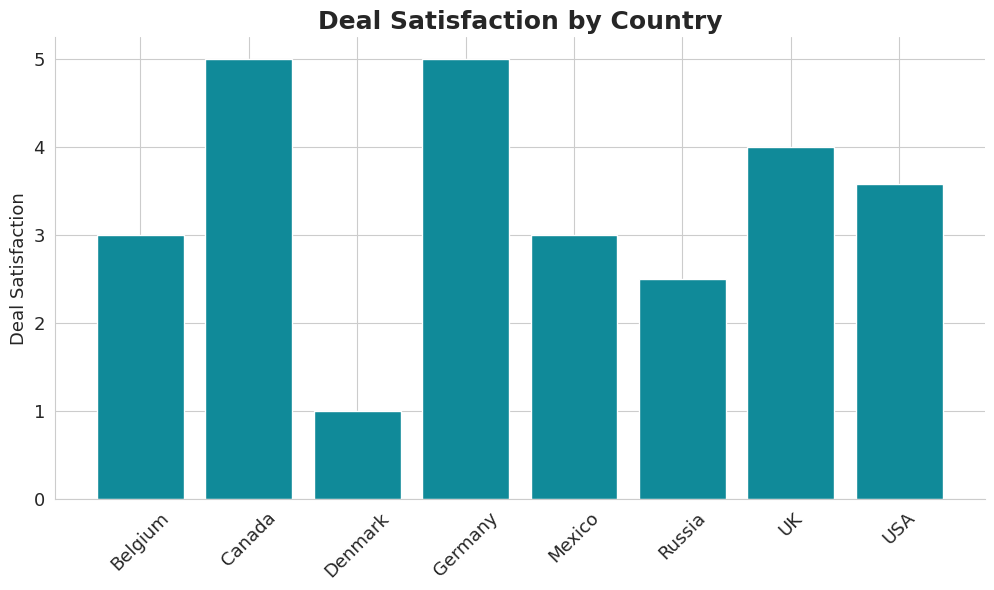

In [366]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 6)) #determine the size of the chart

plt.bar(x = averages_by_country.index, #specify the x axis
        height = averages_by_country['deal_satisfaction'], #specify the y axis
        color = "#108A99") # the color for the bars (365 Data Science color)
# format the ticks
plt.xticks(rotation = 45, fontsize = 13) # rotate and format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.title("Deal Satisfaction by Country", fontsize = 18, fontweight = "bold") #add and format the title for the chart
plt.ylabel("Deal Satisfaction", fontsize = 13 ) #add a title for the y-axis

sns.despine() # removes the top and right border of our graph

plt.show()

##  Customer Age Distribution (Histogram)

In [367]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


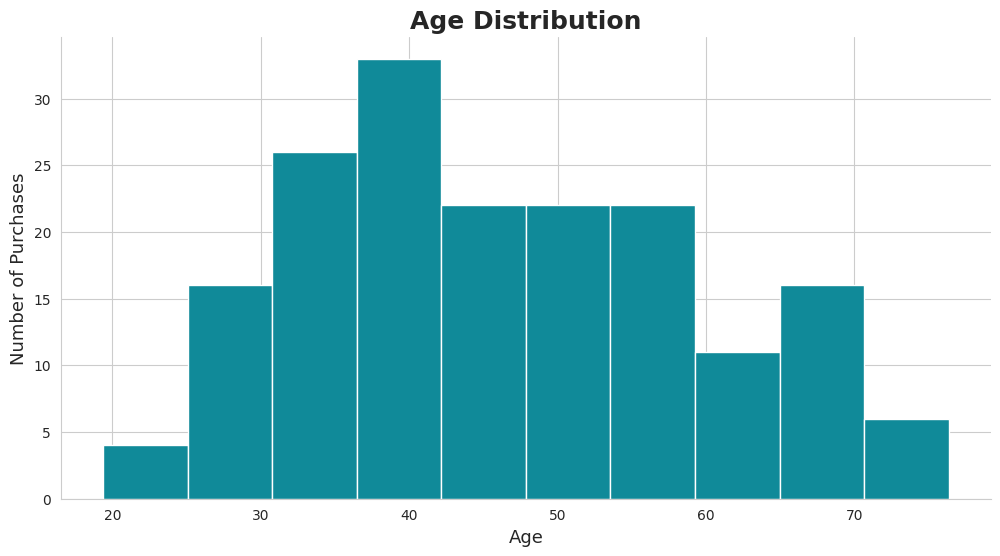

In [368]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 6)) # determine the size of the figure

plt.hist(data['age_at_purchase'], # the variable on which to create the histogram
         bins = 10, # create a histogram with 10 bins
         color = "#108A99")
plt.title("Age Distribution", fontsize = 18, weight = "bold")
plt.xlabel("Age", fontsize=13)
plt.ylabel("Number of Purchases", fontsize=13)

sns.despine() # removes the top and right border of our graph

plt.show()

## Segmentation by State (Pareto diagram)

In [369]:
sold_by_state


,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


In [370]:
# Importing library to plot the percentages on the second y-axis
from matplotlib.ticker import PercentFormatter

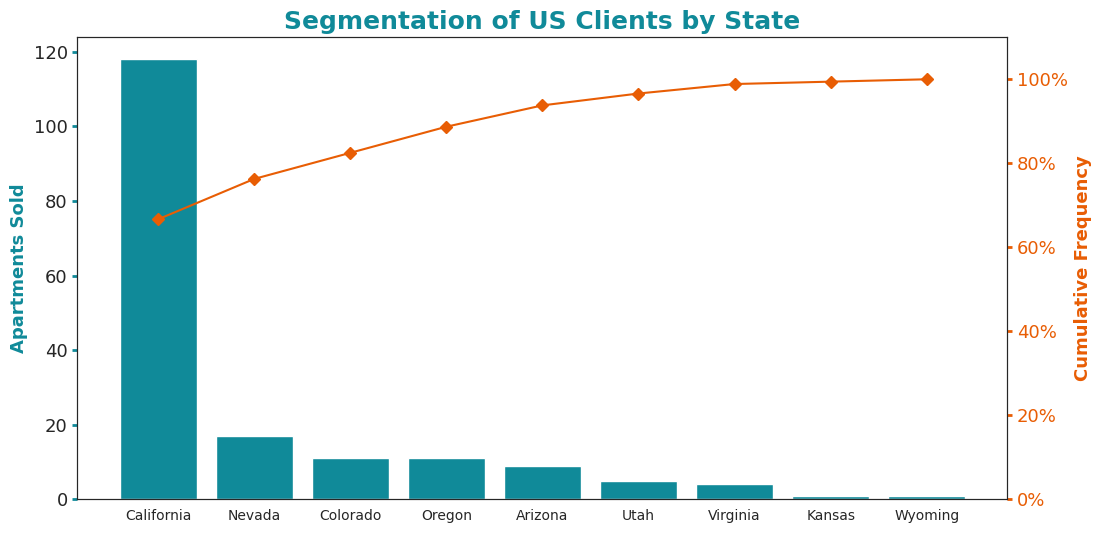

In [371]:
sns.set_style("white")

fig, ax = plt.subplots(figsize = (12, 6))

# The first part of our visualization is a bar chart, featuring the 'sold_by_state' index on the x-axis and the frequency on the y-axis.
ax.bar(sold_by_state.index,
       sold_by_state['frequency'],
       color = "#108A99")
# Setting a descriptive y-axis label.
ax.set_ylabel("Apartments Sold",
              weight='bold',
              fontsize = 13,
              color = "#108A99")
# Formatting the y-axis ticks.
ax.tick_params(axis = "y",
               width = 2,
               labelsize = 13,
               color = "#108A99")

# Creating a second axis that shares the same x-axis as the first.
ax2 = ax.twinx()

# Setting the y-axis limit and formatting it to show percentages.
ax2.set_ylim(0, 1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

# The second part of our visualization is a line chart sharing the x-axis with the bar chart, and featuring the cumulative frequency on the y-axis.
ax2.plot(sold_by_state.index,
         sold_by_state["cumulative_frequency"],
         color = "#E85D04",
         marker = "D")
# Setting a descriptive y-axis label.
ax2.set_ylabel("Cumulative Frequency",
               color = "#E85D04",
               weight = "bold",
               fontsize=13)
# Formatting the y-axis ticks.
ax2.tick_params(axis = "y",
                colors = "#E85D04",
                width = 2,
                labelsize = 13)

# Adding a descriptive and engaging title to our visualization.
ax.set_title("Segmentation of US Clients by State", fontsize = 18, weight = "bold", color = "#108A99")

# Displaying the final visualization.
plt.show()

## Total Sales per Year (Line chart)

In [372]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


In [373]:
# Extracting the year from 'date_sale' to create a 'year_of_purchase' column
data['date_sale'][0].year

2005

In [374]:
data['year_sale'] = data['date_sale'].apply(lambda x: x.year)
data['year_sale']

,year_sale
0,2005.0
1,2005.0
2,2007.0
3,2007.0
4,2004.0
...,...
262,NaN
263,NaN
264,NaN
265,NaN


In [375]:
# Replacing missing values with 0 and converting 'year_sale' to integer type
data['year_sale'] = data['year_sale'].fillna(0).astype(int)

# Subsequently, we convert all zeros back to NA, restoring our dataset's missing value representation.
data['year_sale'] = data['year_sale'].replace({0:pd.NA})


In [376]:

columns_of_interest = ['year_sale','price$']
revenue_per_year = data[columns_of_interest].groupby('year_sale').sum()

# For clarity, we rename the 'price$' column to 'revenue$'.
revenue_per_year = revenue_per_year.rename(columns={'price$':'revenue$'})
revenue_per_year

,revenue$
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


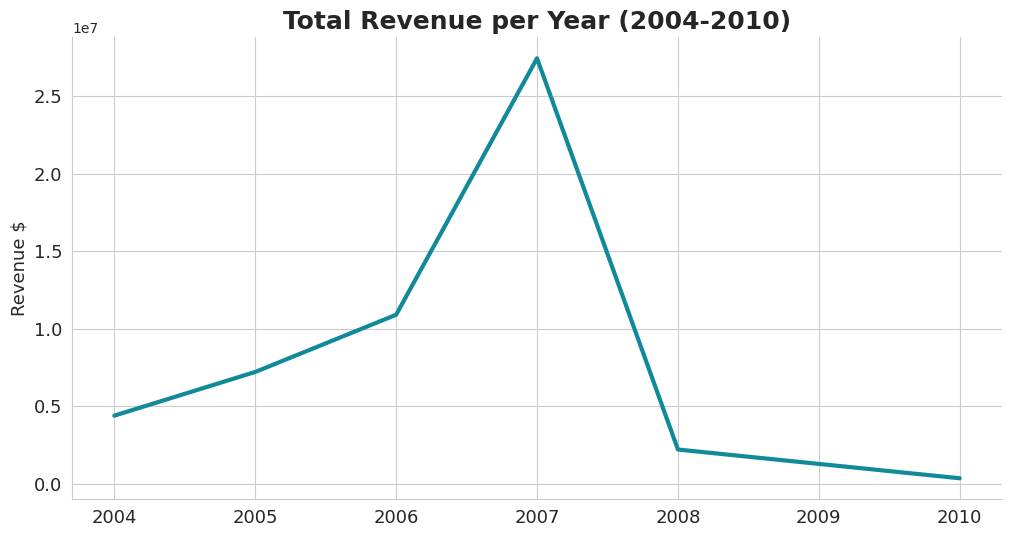

In [377]:

sns.set_style("whitegrid")

# We'll generate a figure that aligns aesthetically with our other visualizations.
plt.figure(figsize = (12, 6))

# A line chart will be constructed to represent revenue per year.
plt.plot(revenue_per_year['revenue$'],
         color='#108A99',
         linewidth=3)

# Let's ensure our visualization includes essential chart elements like title, labels, and legends.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $", fontsize = 13)
plt.xticks(fontsize = 13) # We'll format and adjust the orientation of labels on the x-axis.
plt.yticks(fontsize = 13) # y-axis label formatting

sns.despine() # We'll remove the top and right borders of the chart for a cleaner look.

plt.show() # Finally, display the visualization.

In [378]:
# Converting revenue to millions for better readability
revenue_per_year['revenue$inM'] = revenue_per_year['revenue$'] / 1000000

In [379]:
revenue_per_year

,revenue$,revenue$inM
year_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538


In [380]:
# Make a copy of the original DataFrame
revenue_per_year_adj = revenue_per_year.copy()

# Create a DataFrame for the new row
new_row = pd.DataFrame({'revenue$': [0], 'revenue$inM': [0]}, index=['2009'])

# Concatenate the new row with the original DataFrame
revenue_per_year_adj = pd.concat([revenue_per_year_adj, new_row])

# Adjust the index to include 2009 explicitly
revenue_per_year_adj.index = ['2004', '2005', '2006', '2007', '2008', '2010', '2009']

# Reorder the DataFrame to arrange years chronologically
revenue_per_year_adj = revenue_per_year_adj.loc[['2004', '2005', '2006', '2007', '2008', '2009', '2010']]

# Display the adjusted DataFrame
revenue_per_year_adj


,revenue$,revenue$inM
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2009,0.00,0.000000
2010,357538.20,0.357538


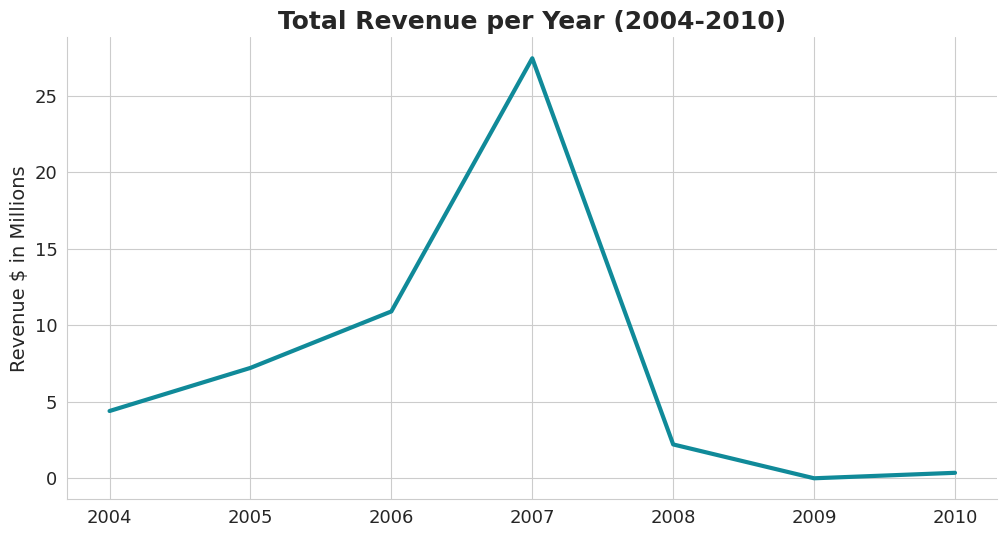

In [381]:

sns.set_style("whitegrid")

plt.figure(figsize = (12, 6))

# Construct a line chart using the adjusted data.
plt.plot(revenue_per_year_adj['revenue$inM'],
         color='#108A99',
         linewidth=3)

# Add formatting elements to the chart: a title, labels and a legend.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $ in Millions", fontsize = 14)
plt.xticks(fontsize = 13) # Format the labels for the x-axis.
plt.yticks(fontsize = 13) # Format the y-axis labels.

sns.despine() # Remove the top and right border of the chart for a cleaner look.

plt.show() # Display the chart.

## Yearly Sales Distribution Across Buildings (Stacked Area Chart)


In [418]:
# Thus,Create a new data variable.
data_stacked_area = data.copy()

In [419]:
# Splitting the 'building' variable into separate dummy variables for each building type
building_dummies = pd.get_dummies(data_stacked_area['building'])
building_dummies.head()

,1,2,3,4,5
0,True,False,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,True,False,False,False,False


In [420]:
data_stacked_area = pd.concat([data_stacked_area, building_dummies], axis=1)
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,True,False,False,False,False


In [421]:
# next, we can rename them accordingly
data_stacked_area = data_stacked_area.rename(columns={'1':'building1',
                                                    '2':'building2',
                                                    '3':'building3',
                                                    '4':'building4',
                                                    '5':'building5'})
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,True,False,False,False,False


In [422]:
# Finally, let's filter out only the sold apartments
data_stacked_area = data_stacked_area[data_stacked_area['sold'] == 1]

In [429]:
# To make the breakdown by year and by building, we'll include the 'year_sale' and all the building dummies.
columns_of_interest = ['year_sale','building1','building2','building3','building4','building5']
stacked_area = data_stacked_area[columns_of_interest].groupby('year_sale').sum()
stacked_area

KeyError: "['building1', 'building2', 'building3', 'building4', 'building5'] not in index"

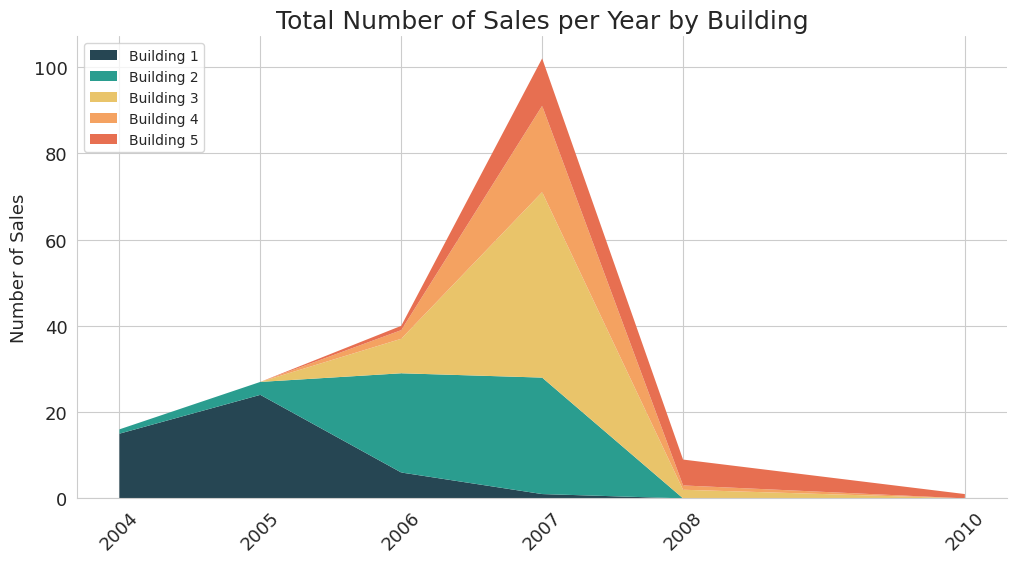

In [430]:
colors = ["#264653", "#2A9D8F", "#E9C46A", "#F4A261", "#E76F51"]

# List of labels for the legend.
# These should appear in the same order as the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]

# Utilize seaborn's 'whitegrid' theme for a cleaner look with a white background.
sns.set_style("whitegrid")

# Initiate a figure that's in line with the dimensions of the other figures.
plt.figure(figsize = (12, 6))

# Create a stacked area plot with our data.
plt.stackplot(stacked_area.index, # The x-axis is simply the index (the year).
              stacked_area['building1'],
              stacked_area['building2'],
              stacked_area['building3'],
              stacked_area['building4'],
              stacked_area['building5'],
              colors = colors,
              edgecolor = 'none')

# Include x-axis labels for each year and rotate them by 45 degrees for better readability.
plt.xticks(stacked_area.index, rotation = 45)

# Add a legend and specify its location on the chart.
plt.legend(labels = labels, loc = "upper left")

# Label the y-axis and format the x and y tick marks for improved readability.
plt.ylabel("Number of Sales", fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# Provide a clear title for the chart.
plt.title("Total Number of Sales per Year by Building", fontsize = 18)

# Remove top and right borders of the chart for a cleaner look.
sns.despine()

# Display the plot.
plt.show()

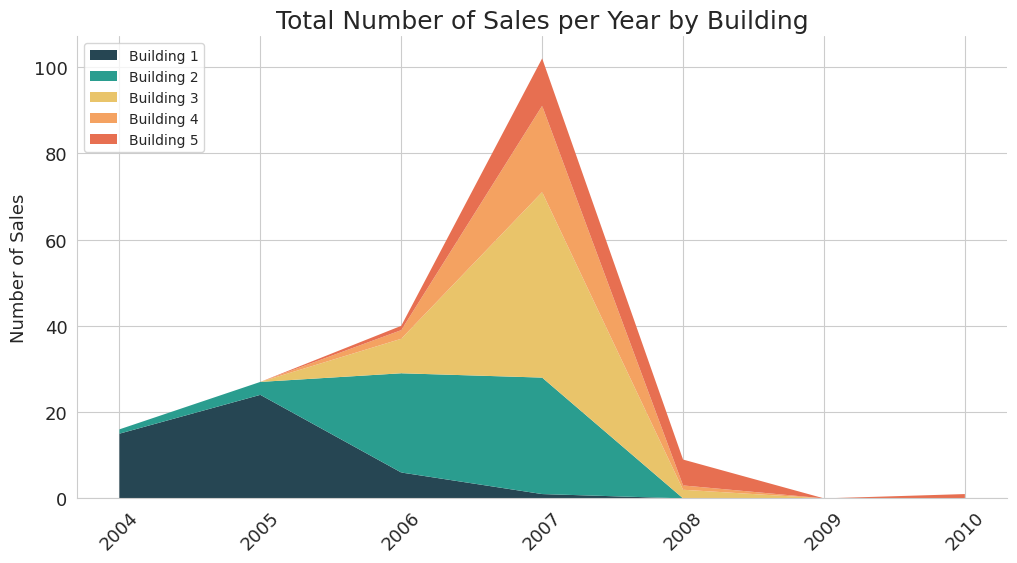

In [426]:
# To add 2009 to the graph, we first adjust the DataFrame.

# Make a copy of the original DataFrame to avoid modifying it directly.
stacked_area_adj = stacked_area.copy()

# Update the index of the DataFrame to reflect the actual years in the dataset.
# Make sure this list corresponds to the actual years of your data.
stacked_area_adj.index = ['2004', '2005', '2006', '2007', '2008', '2010']

# Add a new row for 2009 with all buildings having 0 sales as no sales were made that year.
new_row = pd.DataFrame({'building1': [0],
                        "building2": [0],
                        "building3": [0],
                        "building4": [0],
                        "building5": [0]},
                       index=['2009'])

# Merge the new row with the existing DataFrame.
stacked_area_adj = pd.concat([stacked_area_adj, new_row])

# Rearrange the rows to include 2009 in its correct chronological position.
stacked_area_adj = stacked_area_adj.loc[['2004', '2005', '2006', '2007', '2008', '2009', '2010']]

######################################################################################################

# Define distinct colors for each building for better visualization.
colors = ["#264653", "#2A9D8F", "#E9C46A", '#F4A261', '#E76F51']

# List of labels for the legend to explain the colors in the plot.
labels = ['Building 1', 'Building 2', 'Building 3', 'Building 4', 'Building 5']

# Set the style of the plot for a clean appearance.
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

# Create the stacked area plot with the adjusted DataFrame.
plt.stackplot(stacked_area_adj.index,  # Use the index as the x-axis (representing the years).
              stacked_area_adj['building1'],
              stacked_area_adj['building2'],
              stacked_area_adj['building3'],
              stacked_area_adj['building4'],
              stacked_area_adj['building5'],
              colors=colors,
              edgecolor='none')

# Format the x-axis labels and add a legend to the plot.
plt.xticks(stacked_area_adj.index, rotation=45)  # Rotate labels for better readability.
plt.legend(labels=labels, loc="upper left")  # Position the legend in the top-left corner.
plt.ylabel("Number of Sales", fontsize=13)  # Add a label to the y-axis.
plt.xticks(fontsize=13)  # Set the font size of the x-axis labels.
plt.yticks(fontsize=13)  # Set the font size of the y-axis labels.

# Add a title to the plot to describe the data being represented.
plt.title("Total Number of Sales per Year by Building", fontsize=18)

# Remove unnecessary plot borders to enhance the visual appeal.
sns.despine()

# Display the plot to the screen.
plt.show()
